# Import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import  Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split

# Load in the data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


# Extract first 10000 samples

In [ ]:
X  = x_train[0:10000, :]

In [ ]:
X.shape # N x T x D

(10000, 28, 28)

In [ ]:
y = y_train[0:10000]

In [ ]:
y.shape

(10000,)

# Perform Train test split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.1)

In [ ]:
train_data[0].shape  # shape of the first sample of train_data

(28, 28)

# Create the Model

In [4]:
i = Input(train_data[0].shape) # T x D. Here  T x D = 28 x 28
Bi_LSTM = Bidirectional(LSTM(128, return_sequences = True))
X = Bi_LSTM(i)
X = GlobalMaxPooling1D()(X)
X = Dense(10, activation='softmax')(X)
model = Model(i, X)

In [ ]:
# i = Input(train_data[0].shape) # T x D. Here  T x D = 28 x 28
# x = LSTM(128)(i)
# x = Dense(10, activation='softmax')(x)
# model = Model(i, x)

# Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [ ]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 50)

Epoch 1/50
282/282 [==============================] - 34s 101ms/step - loss: 1.0671 - accuracy: 0.7050 - val_loss: 0.4955 - val_accuracy: 0.8670
Epoch 2/50
282/282 [==============================] - 23s 81ms/step - loss: 0.4092 - accuracy: 0.8863 - val_loss: 0.3450 - val_accuracy: 0.8980
Epoch 3/50
282/282 [==============================] - 26s 91ms/step - loss: 0.2903 - accuracy: 0.9170 - val_loss: 0.3275 - val_accuracy: 0.8990
Epoch 4/50
282/282 [==============================] - 26s 91ms/step - loss: 0.2416 - accuracy: 0.9278 - val_loss: 0.2635 - val_accuracy: 0.9200
Epoch 5/50
282/282 [==============================] - 23s 82ms/step - loss: 0.1987 - accuracy: 0.9404 - val_loss: 0.2401 - val_accuracy: 0.9250
Epoch 6/50
282/282 [==============================] - 24s 85ms/step - loss: 0.1686 - accuracy: 0.9492 - val_loss: 0.2128 - val_accuracy: 0.9250
Epoch 7/50
282/282 [==============================] - 25s 89ms/step - loss: 0.1490 - accuracy: 0.9566 - val_loss: 0.2357 - val_accuracy

# Visualize the Model Performance

In [ ]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

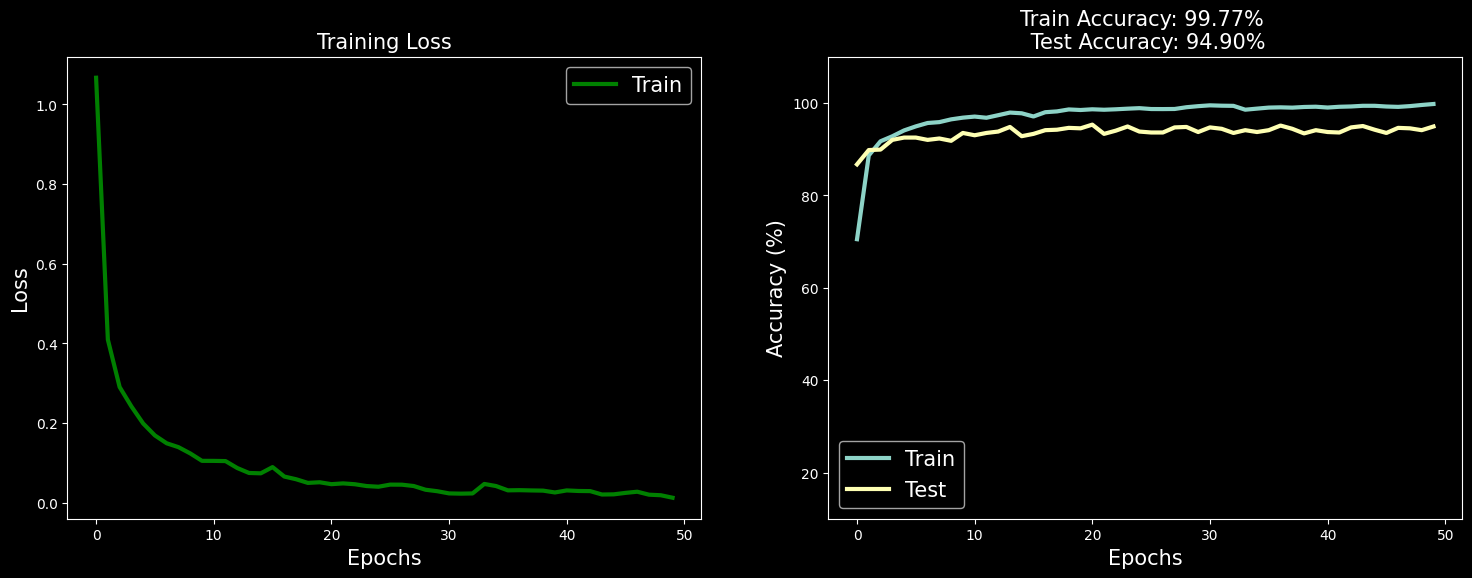

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()